In [183]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Searching for best model
Comparison of different models:

In [100]:
def make_df(model_names, col1, nr_epochs=None):
    results = pd.DataFrame(columns=[col1, 'Phase', 'Accuracy', 'Epoch'])
    long = {'id': 'Identity', 'ge': 'Gender', 'et': 'Ethnicity'}
    for name in model_names:
        [train_res, val_res] = joblib.load(f"{name}.joblib")
        name_split = name.split('_')
        col1_dict = {'Recognizing': long[name_split[2]], 'Batch size': name_split[6], 'Model': name_split[1]}
        if nr_epochs: rnge = nr_epochs
        else: rnge=len(train_res)
        for i in range(rnge):
            results = results.append({col1: col1_dict[col1], 'Phase': 'train', 'Accuracy': train_res[i],
                                      'Epoch': i}, ignore_index=True)
            results = results.append({col1: col1_dict[col1], 'Phase': 'val', 'Accuracy': val_res[i],
                                      'Epoch': i}, ignore_index=True)
    return results

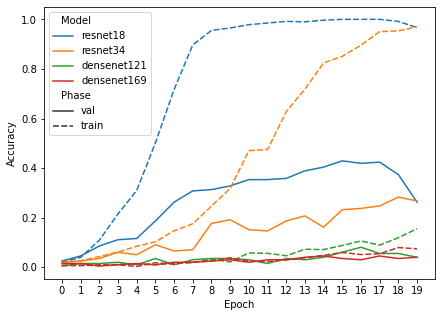

In [128]:
names_id = ['hist_resnet18_id_e_20_b_20', 'hist_resnet34_id_e_20_b_20', 'hist_densenet121_id_e_20_b_8',
            'hist_densenet169_id_e_20_b_6']
results = make_df(names_id, 'Model')

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()))
plt.savefig('models.png')
plt.show()

Densenet comparison:

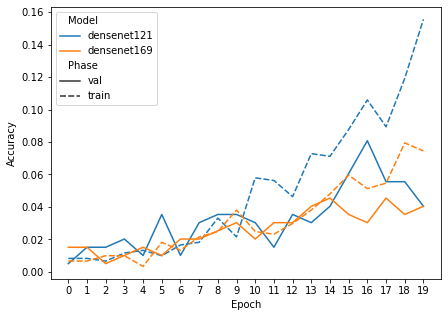

In [103]:
# lower learning rate -> worse
names_id = ['hist_densenet121_id_e_20_b_8',
            'hist_densenet169_id_e_20_b_6']
results = make_df(names_id, 'Model')

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()))
plt.show()

We can see that both densenet models perform much worse, so we will continue only with resnet architectures.

## ResNet18
Accuracy of *resnet18* (batch size 20, learning rate 0.001) on different recognition problems:

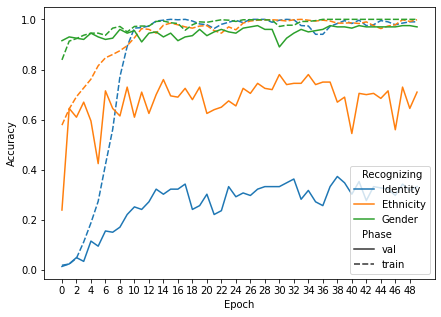

In [111]:
model_names = ['hist_resnet18_id_e_50_b_20', 'hist_resnet18_et_e_50_b_20', 'hist_resnet18_ge_e_50_b_20']
results = make_df(model_names, 'Recognizing')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Recognizing', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()


### Identity problem
Accuracy of *resnet18* on identity problem with different batch sizes:
--> best 15

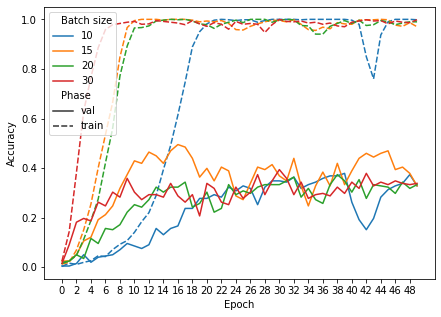

In [106]:
model_names = ['hist_resnet18_id_e_50_b_10', 'hist_resnet18_id_e_50_b_15', 'hist_resnet18_id_e_50_b_20', 'hist_resnet18_id_e_50_b_30']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Different learning rates, resnet18, identity problem
--> best 0.001

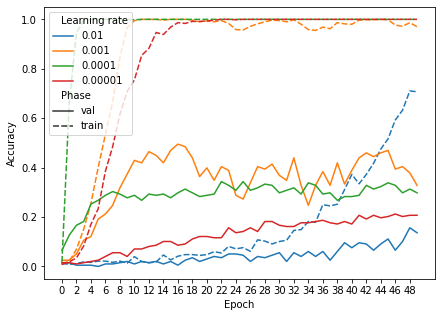

In [121]:
model_names = ['hist_resnet18_id_e_50_b_15_l01', 'hist_resnet18_id_e_50_b_15', 'hist_resnet18_id_e_50_b_15_l4',
               'hist_resnet18_id_e_50_b_15_l5']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(4):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.0{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.0{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()


### Ethnicity problem

Accuracy of *resnet18* on ethnicity problem with different batch sizes:
--> best 15

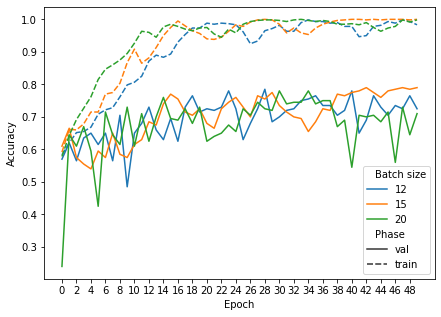

In [120]:
model_names = ['hist_resnet18_et_e_50_b_12', 'hist_resnet18_et_e_50_b_15', 'hist_resnet18_et_e_50_b_20']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()


Different learning rates, resnet18, ethnicity problem (batch size 20)
--> best 0.0001

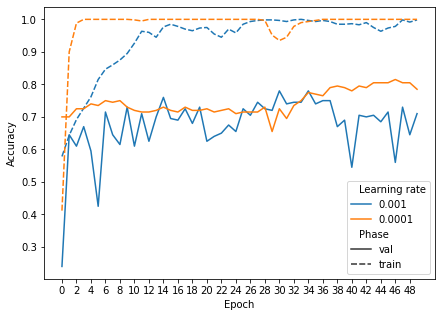

In [129]:
model_names = ['hist_resnet18_et_e_50_b_20', 'hist_resnet18_et_e_50_b_20_l4']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(2):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Different learning rates, resnet18, ethnicity problem (batch size 12)
--> best 0.0001

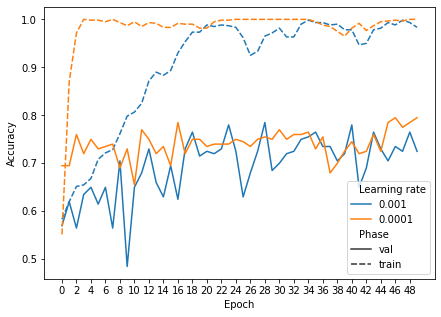

In [132]:
model_names = ['hist_resnet18_et_e_50_b_12', 'hist_resnet18_et_e_50_b_12_l4']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(2):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Different learning rates, resnet18, ethnicity problem (batch size 15)
--> best 0.0001

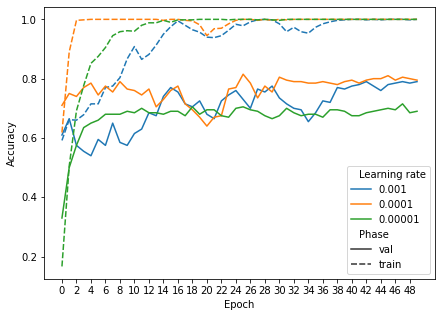

In [177]:
model_names = ['hist_resnet18_et_e_50_b_15', 'hist_resnet18_et_e_50_b_15_l4', 'hist_resnet18_et_e_50_b_15_l5']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(3):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

### Gender problem


Accuracy of *resnet18* on gender problem with different batch sizes:
--> best 20

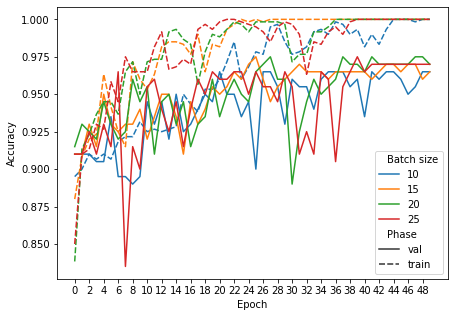

In [178]:
model_names = ['hist_resnet18_ge_e_50_b_10', 'hist_resnet18_ge_e_50_b_15', 'hist_resnet18_ge_e_50_b_20', 'hist_resnet18_ge_e_50_b_25']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()


Different learning rates, resnet18, gender problem (batch size 20)
--> best 0.0001

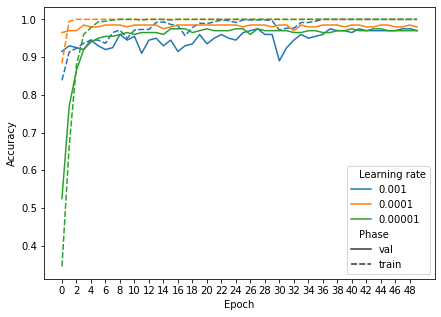

In [188]:
model_names = ['hist_resnet18_ge_e_50_b_20', 'hist_resnet18_ge_e_50_b_20_l4', 'hist_resnet18_ge_e_50_b_20_l5']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(3):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()



## ResNet34

Accuracy of *resnet34* (batch size 20, learning rate 0.001) on different recognition problems:

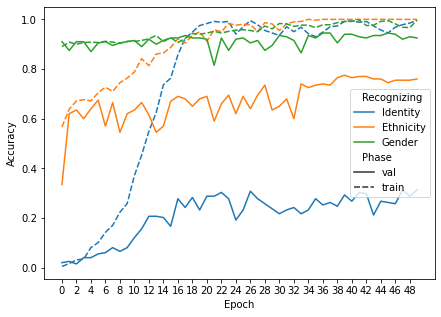

In [191]:
model_names = ['hist_resnet34_id_e_50_b_20', 'hist_resnet34_et_e_50_b_20', 'hist_resnet34_ge_e_50_b_20']
results = make_df(model_names, 'Recognizing')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Recognizing', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()


### Identity problem

Accuracy of *resnet34* on identity problem with different batch sizes:
--> best 20 (max batch size on 2GB GPU), resnet18 learns better

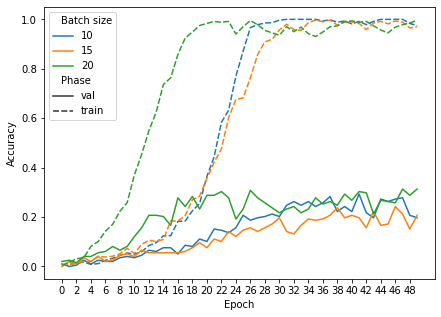

In [190]:
model_names = ['hist_resnet34_id_e_50_b_10', 'hist_resnet34_id_e_50_b_15', 'hist_resnet34_id_e_50_b_20']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Comparison of resnet18 and resnet34 with learning rate 0.0001 on identity problem.
--> resnet18 learns better

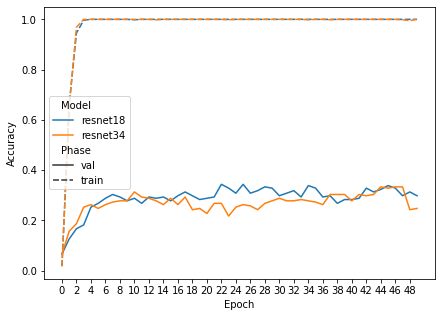

In [192]:
model_names = ['hist_resnet18_id_e_50_b_15_l4', 'hist_resnet34_id_e_50_b_20_l4']
results = make_df(model_names, 'Model')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()


### Ethnicity problem

Let's look if resnet34 performs better than best resnet18 on ethnicity problem

Different learning rates, resnet34, ethnicity problem

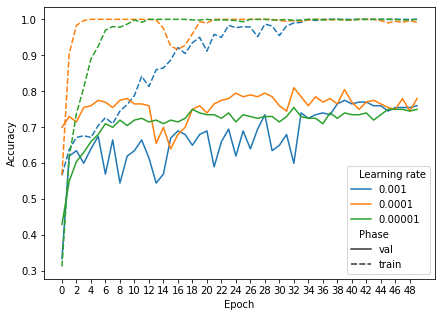

In [209]:
model_names = ['hist_resnet34_et_e_50_b_20', 'hist_resnet34_et_e_50_b_20_l4', 'hist_resnet34_et_e_50_b_20_l5']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(3):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

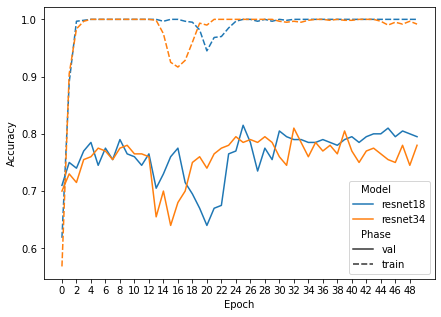

In [210]:
model_names = ['hist_resnet18_et_e_50_b_15_l4', 'hist_resnet34_et_e_50_b_20_l4']
results = make_df(model_names, 'Model')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()[::2]))
plt.show()


### Gender problem
Accuracy of resnet34 on ethnicity problem with different batch sizes:

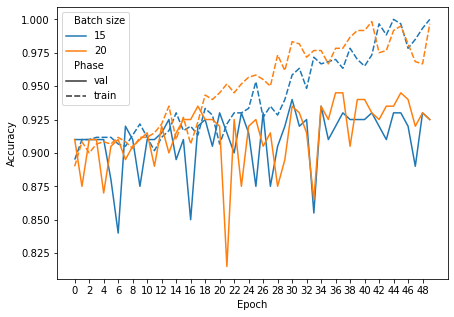

In [211]:
model_names = ['hist_resnet34_ge_e_50_b_15', 'hist_resnet34_ge_e_50_b_20']
results = make_df(model_names, 'Batch size')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Batch size', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()[::2]))
plt.show()

Different learning rates, resnet34, gender problem

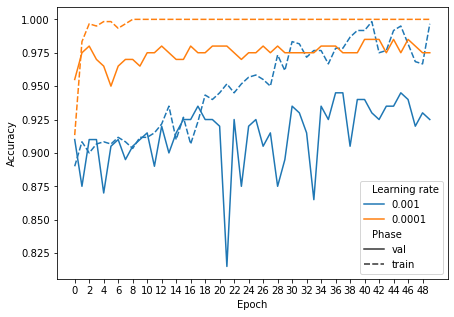

In [220]:
model_names = ['hist_resnet34_ge_e_50_b_20', 'hist_resnet34_ge_e_50_b_20_l4']
results = pd.DataFrame(columns=['Learning rate', 'Phase', 'Accuracy', 'Epoch'])
for j in range(2):
    [train_res, val_res] = joblib.load(f"{model_names[j]}.joblib")
    for i in range(len(train_res)):
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'train', 'Accuracy': train_res[i],
                                  'Epoch': i}, ignore_index=True)
        results = results.append({'Learning rate': f"0.00{j*'0'}1", 'Phase': 'val', 'Accuracy': val_res[i],
                                  'Epoch': i}, ignore_index=True)

plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Learning rate', style='Phase', style_order=['val', 'train'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(list(results['Epoch'].unique())[::2])
plt.show()

Comparison of best resnet18 (batch size 20, learning rate 0.0001) and resnet34 (same) on gender recognition.

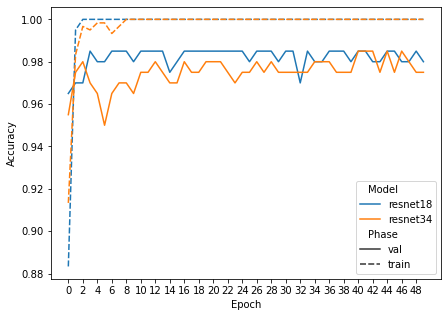

In [215]:
model_names = ['hist_resnet18_ge_e_50_b_20_l4', 'hist_resnet34_ge_e_50_b_20_l4']
results = make_df(model_names, 'Model')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Model', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()[::2]))
plt.show()

#
## Conclusion

Training of the best models

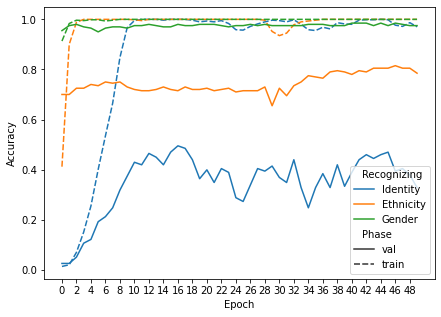

In [240]:
model_names = ['hist_resnet18_id_e_50_b_15', 'hist_resnet18_et_e_50_b_20_l4', 'hist_resnet34_ge_e_50_b_20_l4']
results = make_df(model_names, 'Recognizing')
plt.figure(figsize=(7,5))
sns.lineplot(data=results, x='Epoch', y='Accuracy', hue='Recognizing', style='Phase', style_order=['val', 'train'])
plt.xticks(list(results['Epoch'].unique()[::2]))
plt.savefig('final.png')


In [ ]:
#######################################################################################################################

# Results
### Identity

In [185]:
id_18_20 = joblib.load('conf_resnet18_id_e_50_b_20.joblib')
print(f'Accuracy on test: {round(sum(np.diag(id_18_20))/ np.sum(id_18_20), 4)}')


Accuracy on test: 0.3586


### Ethnicity

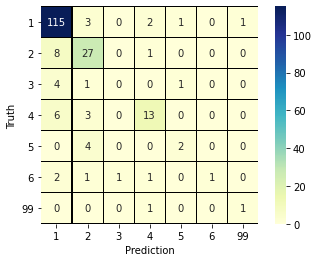

In [235]:
et_18_20 = joblib.load('conf_resnet18_et_e_50_b_20_l4.joblib')
classes = [1, 2, 3, 4, 5, 6, 99]
g = sns.heatmap(et_18_20.astype(int), annot=True, linewidths=0.1, linecolor='black', square=True, cmap="YlGnBu", fmt="",
                xticklabels=classes, yticklabels=classes)
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.savefig('confusion.png')

In [236]:
print(sum(np.diag(et_18_20))/sum(sum(et_18_20)))

0.795


Majority classifier

In [237]:
print(sum(et_18_20[0,:])/sum(sum(et_18_20)))

0.61


### Gender

In [238]:
ge_18_20 = joblib.load('conf_resnet18_ge_e_50_b_20_l4.joblib')
ge_18_20

array([[ 12.,   6.],
       [  2., 180.]])

In [239]:
ge_34_20 = joblib.load('conf_resnet34_ge_e_50_b_20_l4.joblib')
ge_34_20

array([[ 14.,   4.],
       [  4., 178.]])